In [2]:
import pandas as pd

# Load the dataset into a Pandas dataframe
df = pd.read_csv('YouTubeTrendingVedioMetaDataDataSet/USvideos.csv')

# Inspect the first few rows of the dataframe
print(df.head())


      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [3]:

# Convert the trending_date column to a datetime object
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Print the first few rows of the dataframe to confirm the change
print(df.head())


      video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [3]:
# Get the number of rows and columns in the dataframe
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 40949
Number of columns: 16


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
print(df.describe())

        category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06


In [6]:
print(df['category_id'].value_counts())

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64


In [7]:
import json

# Load the category id to category name mapping from US_category_id.json
with open('YouTubeTrendingVedioMetaDataDataSet/US_category_id.json') as f:
    data = json.load(f)

# Print the category id and name for each category
for category in data['items']:
    print(category['id'], category['snippet']['title'])


1 Film & Animation
2 Autos & Vehicles
10 Music
15 Pets & Animals
17 Sports
18 Short Movies
19 Travel & Events
20 Gaming
21 Videoblogging
22 People & Blogs
23 Comedy
24 Entertainment
25 News & Politics
26 Howto & Style
27 Education
28 Science & Technology
29 Nonprofits & Activism
30 Movies
31 Anime/Animation
32 Action/Adventure
33 Classics
34 Comedy
35 Documentary
36 Drama
37 Family
38 Foreign
39 Horror
40 Sci-Fi/Fantasy
41 Thriller
42 Shorts
43 Shows
44 Trailers


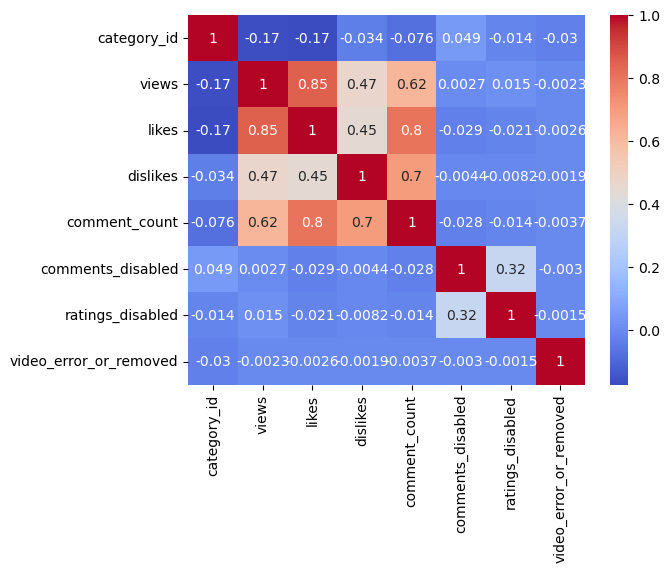

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [9]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

                        category_id     views     likes  dislikes  \
category_id                1.000000 -0.168231 -0.173921 -0.033547   
views                     -0.168231  1.000000  0.849177  0.472213   
likes                     -0.173921  0.849177  1.000000  0.447186   
dislikes                  -0.033547  0.472213  0.447186  1.000000   
comment_count             -0.076307  0.617621  0.803057  0.700184   
comments_disabled          0.048949  0.002677 -0.028918 -0.004431   
ratings_disabled          -0.013506  0.015355 -0.020888 -0.008230   
video_error_or_removed    -0.030011 -0.002256 -0.002641 -0.001853   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                 -0.076307           0.048949         -0.013506   
views                        0.617621           0.002677          0.015355   
likes                        0.803057          -0.028918         -0.020888   
dislikes                     0.700184          -0.004431         -

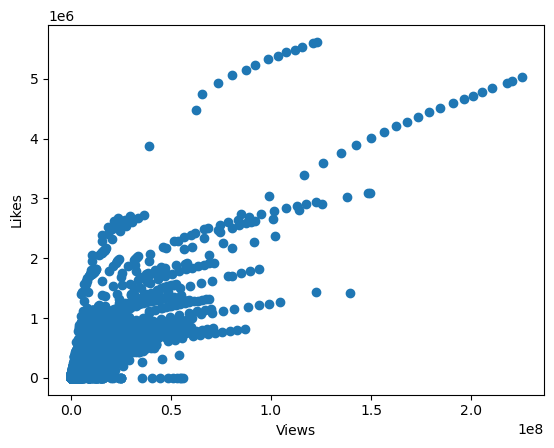

In [10]:
import matplotlib.pyplot as plt

# Plot a scatter plot of views vs likes
plt.scatter(df['views'], df['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()


In [11]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


In [12]:
# Check for duplicate rows in the dataframe
duplicates = df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Drop duplicate rows from the dataframe
df.drop_duplicates(inplace=True)

# Print the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df))

Number of duplicate rows: 48
Number of rows after removing duplicates: 40901


In [13]:
# Drop rows with missing values in the description column
df.dropna(subset=['description'], inplace=True)

In [14]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64


In [15]:
# Display the column names
print(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [16]:

# Drop columns that you don't need
df = df.drop(columns=['video_id', 'publish_time', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed'])


In [17]:
# Display the remaining columns
print(df.columns)

Index(['trending_date', 'title', 'channel_title', 'category_id', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'description'],
      dtype='object')


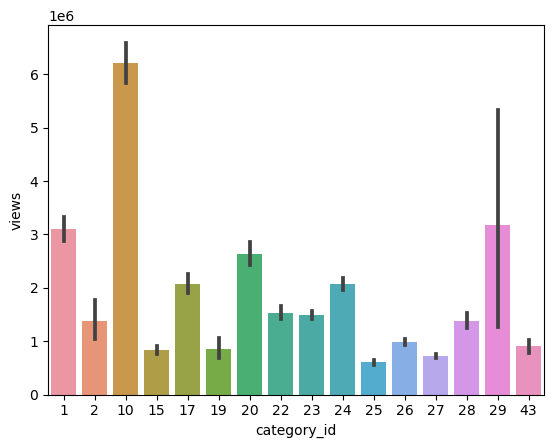

In [18]:
# Plot a bar plot of views by category using Seaborn
sns.barplot(x='category_id', y='views', data=df)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# Define the features and target variables
X = df.drop(['views'], axis=1)
y = df['views']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (32265, 9)
y_train shape: (32265,)
X_test shape: (8067, 9)
y_test shape: (8067,)


In [20]:
print(X_train, X_test, y_train, y_test)


      trending_date                                              title  \
39271      18.06.06  The History of Fortnite Battle Royale - Did Yo...   
3210       17.30.11          'I have taken poison' claims war criminal   
21311      18.02.03  The Warehouses That (Sort Of) Aren't in Any Co...   
34416      18.13.05  Black Panther's Costume Designer Breaks Down T...   
40123      18.10.06  BTS Plays With Puppies While Answering Fan Que...   
...             ...                                                ...   
6390       17.15.12       Dark Skin People Get Their Ideal Photographs   
11470      18.12.01  Hear what Nick Saban, Tua Tagovailoa, & Da'Ron...   
38759      18.04.06                   We Mastered That Shiny Dirt Ball   
871        17.18.11                              How to be an Aquarius   
16094      18.04.02                      DIY dot matrix pencil printer   

                        channel_title  category_id  \
39271               DidYouKnowGaming?           20   
321

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# select the features you want to use for the model
features = ['views', 'likes', 'dislikes', 'comment_count']

# extract the target column
target = 'views'

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)

# create the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# predict the target values for the test data
y_pred = reg.predict(X_test)

# evaluate the model performance
score = reg.score(X_test, y_test)
print("Linear Regression model score:", score)


Linear Regression model score: 1.0


In [22]:
from sklearn.metrics import r2_score

# Use the model to make predictions on the test set
y_pred = reg.predict(X_test)

# Compute the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score:", r2)


R-squared score: 1.0


In [23]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)


F1 score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

print("Random Forest Regressor score:", rf_score)

Random Forest Regressor score: 0.999808762255312


In [19]:
# Import other regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Initialize the models
#rf = RandomForestRegressor()
svr = SVR()
dt = DecisionTreeRegressor()

# Fit the models on the training data
#rf.fit(X_train, y_train)
svr.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Evaluate the models on the test data
#print("Random Forest Regressor Test Score: ", rf.score(X_test, y_test))
print("Support Vector Regressor Test Score: ", svr.score(X_test, y_test))
print("Decision Tree Regressor Test Score: ", dt.score(X_test, y_test))


Support Vector Regressor Test Score:  -0.054477999391468135
Decision Tree Regressor Test Score:  0.9997994257279641


In [21]:
df.to_csv('preprocessed_data.csv', index=False)

In [22]:
import pandas as pd

# Load preprocessed_data.csv
df = pd.read_csv('preprocessed_data.csv')

# Print first few rows
print(df.head())


  trending_date                                              title  \
0    2017-11-14                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1    2017-11-14  The Trump Presidency: Last Week Tonight with J...   
2    2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3    2017-11-14                   Nickelback Lyrics: Real or Fake?   
4    2017-11-14                           I Dare You: GOING BALD!?   

           channel_title  category_id  \
0           CaseyNeistat           22   
1        LastWeekTonight           24   
2           Rudy Mancuso           23   
3  Good Mythical Morning           24   
4               nigahiga           24   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical m

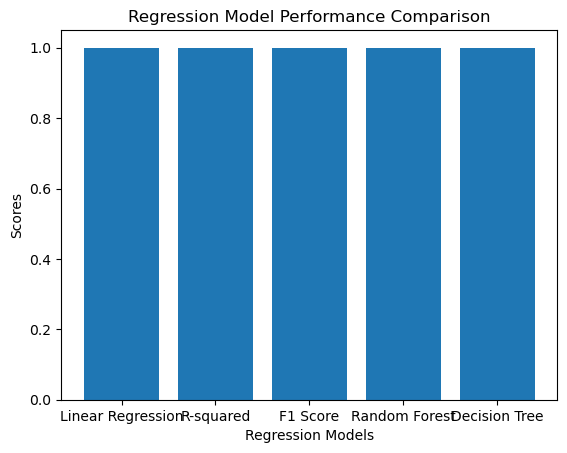

In [1]:
import matplotlib.pyplot as plt

# Define the scores and the model names
scores = [1.0, 1.0, 1.0, 0.999808762255312, 0.9997994257279641]
model_names = ['Linear Regression', 'R-squared', 'F1 Score', 'Random Forest', 'Decision Tree']

# Create a bar chart
plt.bar(model_names, scores)

# Add labels and title
plt.xlabel('Regression Models')
plt.ylabel('Scores')
plt.title('Regression Model Performance Comparison')

# Show the plot
plt.show()


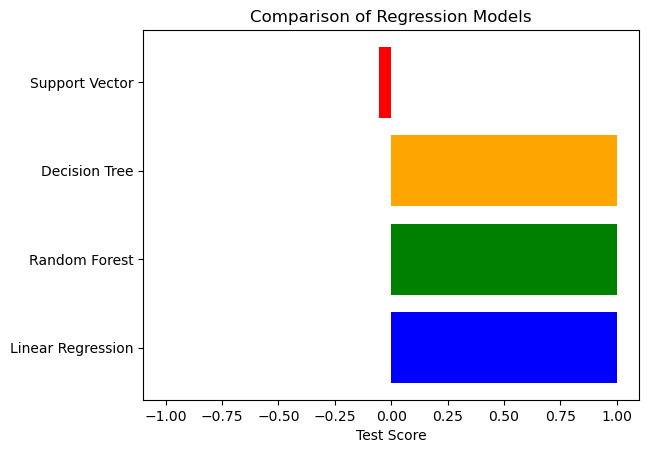

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Test scores for each model
lr_score = 1.0
rf_score = 0.999808762255312
dt_score = 0.9997994257279641
svr_score = -0.054477999391468135

# Create a horizontal bar plot
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Support Vector']
scores = [lr_score, rf_score, dt_score, svr_score]
colors = ['blue', 'green', 'orange', 'red']
plt.barh(models, scores, color=colors)

# Add labels and title
plt.xlabel('Test Score')
plt.title('Comparison of Regression Models')

# Set limits for the x-axis
plt.xlim([-1.1, 1.1])

# Show the plot
plt.show()
